# Linear Regression

## Main Idea

The main idea of linear regression is:
- Use least-squares to fit a line to the data
- Calculate R^2

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# For simplicity, we will do linear regression with less data
X = X[["MedInc"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

print(pd.concat([X_train, y_train], axis=1).head())

   MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585
2  7.2574        3.521
3  5.6431        3.413
4  3.8462        3.422


## Linear Regression And Linear Algebra

The equation between feature and its target can be written as

$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \mathbf{\epsilon}$

Where:
- $\mathbf{y}$ is the vector of observed values of the dependent variable $y$
- $\mathbf{X}$ is the feature matrix, which includes the feature values
- $\boldsymbol{\beta}$ is the vector of coefficients, which includes $\beta_0$ and $\beta_1$
- $\mathbf{\epsilon}$ is the vector of residuals (error)

To have a more practical view, if we write each matrices and vectors, it will be

$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} 
= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & 1 & x_n \end{bmatrix} 
\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}
+ \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}$

To calculate $\boldsymbol{\beta}$, we can do

$\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

Calculate $\mathbf{X}^T$ (transpose of $\mathbf{X}$)

In [3]:
X_np = X_train.to_numpy()
X_np = np.hstack([np.ones((len(X_np), 1)), X_np])

print(X_np)

# transpose of X
XT_np = np.matrix.transpose(X_np)

# print(XT_np)

[[1.     8.3252]
 [1.     8.3014]
 [1.     7.2574]
 ...
 [1.     3.3021]
 [1.     2.25  ]
 [1.     2.7303]]


Calculate $\mathbf{X}^T \mathbf{X}$

In [4]:
# multiplication of XT and X
XT_X_np = np.linalg.matmul(XT_np, X_np)

# print(XT_X_np)

Calcualte $(\mathbf{X}^T \mathbf{X})^{-1}$

In [5]:
# inverse of multiplication of XT and X
XT_X_inv_np = np.linalg.inv(XT_X_np)

# print(XT_X_inv_np)

Calculate $\mathbf{X}^T \mathbf{y}$

In [6]:
y_np = y_train.to_numpy()

# multiplication of XT and y
XT_y_np = np.matmul(XT_np, y_np)

# print(XT_y_np)

Finally, calculate $\boldsymbol{\beta}$

In [7]:
B_np = np.matmul(XT_X_inv_np, XT_y_np)

print(B_np)

[0.45203504 0.4178011 ]


## $R^2$

First, we need to calculate the predicted $y$

$y = \beta_0x + \beta_1$

In [8]:
def predict(X):
    return (B_np[0] * X) + B_np[1]

y_pred = X_test.apply(predict)

# convert to pd.Series
y_pred = y_pred.iloc[:, 0]

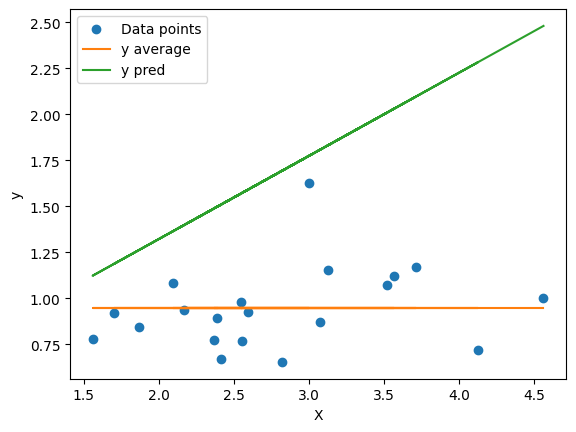

In [9]:
# Plot data to see the average Y
fig, (ax) = plt.subplots()

ax.scatter(X_test, y_test, label="Data points")
ax.plot(X_test, pd.Series([y_test.mean()] * len(y_test)), label="y average", color="tab:orange")
ax.plot(X_test, y_pred, label="y pred", color="tab:green")
ax.set(xlabel="X", ylabel="y")
ax.legend()

plt.show()

To calculate $R^2$, we must calculate total sum of squares ($TSS$) and residual sum of squares ($RSS$)

$TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$

$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$R^2 = 1 - \frac{RSS}{TSS}$

In addition, we will also calculate $MSE$ for the sake of benchmarking with scikit-learn

$MSE = \frac{RSS}{n}$

Calculate $TSS$

In [17]:
tss = 0

for v in y_test:
    tss = tss + (v - y_test.mean())**2

print(tss)

0.94155055


Calculate $RSS$

In [18]:
rss = 0

for (_, v_test), (_, v_pred) in zip(y_test.items(), y_pred.items()):
    rss = rss + (v_test - v_pred)**2

print(rss)

13.289895031131408


Calculate $R^2$

In [19]:
r_squared = 1 - (rss/tss)

print(f"R^2: {r_squared}")
print(f"R^2 (sklearn.metrics): {r2_score(y_test, y_pred)}")

R^2: -13.114903369905534
R^2 (sklearn.metrics): -13.114903369905534


Calculate $MSE$

In [20]:
mse = rss / len(y_test)

print(y_test)
print(y_pred)

print(f"MSE: {mse}")
print(f"MSE (sklearn.metrics): {mean_squared_error(y_test, y_pred)}")

20620    1.000
20621    0.775
20622    0.670
20623    0.655
20624    0.872
20625    0.720
20626    0.938
20627    1.625
20628    0.924
20629    1.083
20630    1.120
20631    1.072
20632    1.156
20633    0.983
20634    1.168
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, dtype: float64
20620    2.480211
20621    1.487361
20622    1.510234
20623    1.694122
20624    1.807312
20625    2.282446
20626    1.397225
20627    1.773906
20628    1.590922
20629    1.364498
20630    2.030346
20631    2.008015
20632    1.830411
20633    1.570264
20634    2.095981
20635    1.123111
20636    1.573564
20637    1.186261
20638    1.261841
20639    1.497532
Name: MedInc, dtype: float64
MSE: 0.6644947515565705
MSE (sklearn.metrics): 0.6644947515565703


## Comparing With scikit-learn's LinearRegression()

In [21]:
regressor = LinearRegression().fit(X_train, y_train)

y_pred_sklearn = regressor.predict(X_test)

print(f"R^2 (sklearn.linear_model.LinearRegression): {r2_score(y_test, y_pred_sklearn)}")
print(f"MSE (sklearn.linear_model.LinearRegression): {mean_squared_error(y_test, y_pred_sklearn)}")

R^2 (sklearn.linear_model.LinearRegression): -10.974585682272476
MSE (sklearn.linear_model.LinearRegression): 0.5637338867582887
